Gradient Boosting Models (e.g., XGBoost, LightGBM)

Generalized Additive Models (GAM) 

Support Vector Regression (SVR) 

Convolutional Neural Networks (CNN) 

Recurrent Neural Networks (RNN) 

Long Short-Term Memory Networks (LSTM) 

Transformer-based Models


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('./solar_weather_processed.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              196776 non-null  object 
 1   Energy delta[Wh]  196776 non-null  int64  
 2   GHI               196776 non-null  float64
 3   temp              196776 non-null  float64
 4   pressure          196776 non-null  int64  
 5   humidity          196776 non-null  int64  
 6   wind_speed        196776 non-null  float64
 7   rain_1h           196776 non-null  float64
 8   snow_1h           196776 non-null  float64
 9   clouds_all        196776 non-null  int64  
 10  isDayTime         196776 non-null  int64  
 11  Month             196776 non-null  object 
 12  Hour              196776 non-null  int64  
 13  Week              196776 non-null  int64  
 14  Season            196776 non-null  object 
 15  Day               196776 non-null  object 
dtypes: float64(5), int64

# Seperate file for model buiding only


## Checking feature importance

## Models

### XGboost, ligbtGBM

In [14]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [15]:
# 2. Convert Time to datetime, sort, set index
df['Time'] = pd.to_datetime(df['Time'])
df.sort_values(by='Time', inplace=True)
df.set_index('Time', inplace=True)


In [16]:
# 3. Create lag features (example: lag of 1, 2, 3 hours)
for lag in [1,2,3]:
    df[f'Energy_lag_{lag}'] = df['Energy delta[Wh]'].shift(lag)

In [17]:
# 4. One-hot encode or label encode categorical columns
df = pd.get_dummies(df, columns=['Month', 'Season', 'Day'], drop_first=True)

In [18]:
# 5. Drop rows with NaN created by lag
df.dropna(inplace=True)

In [19]:
# 6. Define X (features) and y (target)
FEATURES = [col for col in df.columns if col != 'Energy delta[Wh]']
X = df[FEATURES]
y = df['Energy delta[Wh]']

In [20]:
# 7. Time-based train-test split (80-20)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

MAE: 98.77400069326818
RMSE: 250.37052787400924


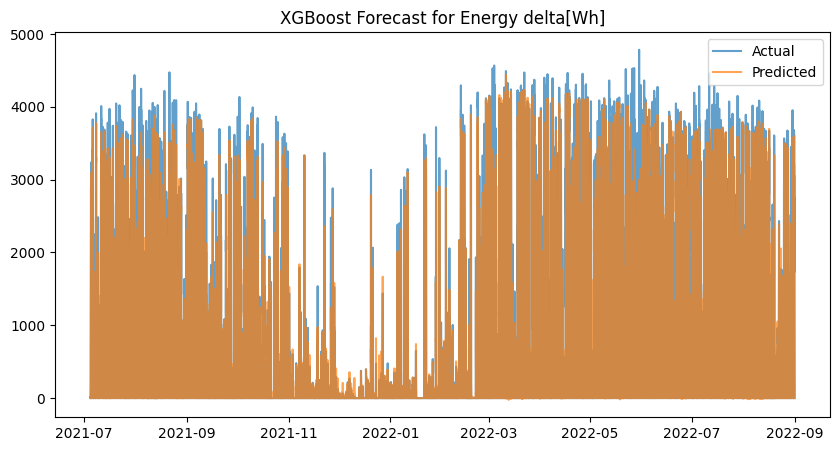

In [21]:
# 8. Train XGBoost
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train, 
          eval_set=[(X_train, y_train), (X_test, y_test)], 
          verbose=False)

# 9. Predict
y_pred = model.predict(X_test)

# 10. Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)

# 11. Plot
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.title("XGBoost Forecast for Energy delta[Wh]")
plt.legend()
plt.show()


### GAM

### SVR

### CNN

### LSTM